# Исследование надежности заемщиков

## 1 Изучение общей информации о данных

**Импорт библиотеки pandas. Считывание данных из csv-файла в датафрейм в переменную `data`.**

In [1]:
import pandas as pd
import seaborn

In [2]:
data = pd.read_csv('C:/Users/klimatutti/Downloads/data.csv')
#data = pd.read_csv('/datasets/data.csv')

**Вывод первых 20 строчек датафрейма `data` на экран**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


При первом знакомстве с данными можно заметить ряд ошибок:
- в столбце ``days_employed`` отрицательные значения (количество отработанных дней может быть только положительным числом)
- в стобце ``education`` слова записаны в разном регистре
- в столбце ``purpose`` одина и таже причина получения кредита записана по-разному
- а также во многих словах есть пропуски значений

**Вывод общей информации о датафрейме**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


На первый взгляд проблем с типами данных не наблюдается, но можно заметить пропуски в столбцах ``days_employed`` и ``total_income``

## 2 Предобработка данных

### Удаление пропусков

**Вывод количества пропущенных значений для каждого столбца.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом**

In [6]:
for i in data['income_type'].unique():
    data.loc[(data['income_type'] == i) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == i), 'total_income'].median()
data['total_income']

0        253875.639453
1        112080.014102
2        145885.952297
3        267628.550329
4        158616.077870
             ...      
21520    224791.862382
21521    155999.806512
21522     89672.561153
21523    244093.050500
21524     82047.418899
Name: total_income, Length: 21525, dtype: float64

Можем увидеть, что значения ``NaN`` в столбце ``total_income`` изменились.

### Обработка аномальных значений

**В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`.**

In [7]:
data['days_employed'] = abs(data['days_employed'])
data['days_employed']

0          8437.673028
1          4024.803754
2          5623.422610
3          4124.747207
4        340266.072047
             ...      
21520      4529.316663
21521    343937.404131
21522      2113.346888
21523      3112.481705
21524      1984.507589
Name: days_employed, Length: 21525, dtype: float64

Можно увидеть, что отрицательные значения в столбце `days_employed` стали положительными

**Рассмотрим медианное значение трудового стажа `days_employed` в днях для каждого типа занятости.**

In [8]:
data.groupby('income_type')['days_employed'].median()

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

Можно увидеть, что у типа занятости *безработный* и *пенсионер* слишком большие значения. Причину таких аномалий выявить сложно, а данные типы занятости в исследовании нам не понадобятся.

**Рассмотрим аномальные значения и в других столбцах, например `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

Аномальные значения здесь *-1* и *20*. Удалим строки с данными значениями.

In [10]:
data = data.loc[(data['children'] != 20) & (data['children'] != -1)]

Проверим, что получилось.

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Пропуски в столбце `total_income` заменили на медианное значение. Сделаем тоже самое с `days_employed`.**

In [12]:
for i in data['income_type'].unique():
    data.loc[(data['income_type'] == i) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == i), 'days_employed'].median()
data['days_employed']

0          8437.673028
1          4024.803754
2          5623.422610
3          4124.747207
4        340266.072047
             ...      
21520      4529.316663
21521    343937.404131
21522      2113.346888
21523      3112.481705
21524      1984.507589
Name: days_employed, Length: 21402, dtype: float64

Пропусков больше нет.

**Проверим все данные. Сейчас пропусков не должно быть нигде.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**Для точности информации поменяем тип данных в стобце `total_income` с вещественного на целочисленный.**

In [14]:
data['total_income'] = data['total_income'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21402 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21402 non-null  int64  
 1   days_employed     21402 non-null  float64
 2   dob_years         21402 non-null  int64  
 3   education         21402 non-null  object 
 4   education_id      21402 non-null  int64  
 5   family_status     21402 non-null  object 
 6   family_status_id  21402 non-null  int64  
 7   gender            21402 non-null  object 
 8   income_type       21402 non-null  object 
 9   debt              21402 non-null  int64  
 10  total_income      21402 non-null  int32  
 11  purpose           21402 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 2.0+ MB


### Обработка дубликатов

**В начале работы мы обратили внимание на то, что в столбце `education` буквы имеют разный регистр. Исправим это.**

In [15]:
data['education'] = data['education'].str.lower()

**Проверим и удалим дубликаты во всем датафрейме.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Для удобства работы с данными добавим новый столбец, в котором клиенты будут разбиты на категории.**
- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [18]:
def categorize_income(param):
    if 0 <= param <= 30000:
        return 'E'
    elif 30001 <= param <= 50000:
        return 'D'
    elif 50001 <= param <= 200000:
        return 'C'
    elif 200001 <= param <= 1000000:
        return 'B'
    else:
        return 'A'

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [20]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,B
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,B
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,C
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,C
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,C


Появился новый столбец с категориями!

**Добавим еще один новый столбец, где клиенты будут разбиты на категории по причинам взятия кредита.
Сначала посмотрим, какие причины бывают.**

In [21]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Как много всего, но если присмотреться, причин всего 4:**
- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Создадим новый стобец с этими категориями**

In [22]:
def categorize_purpose(i):
    if ('жил' in i) or ('недвиж' in i):
        return 'операции с недвижимостью'
    elif 'авт' in i:
        return 'операции с автомобилем'
    elif 'свад' in i:
        return 'проведение свадьбы'
    else:
        return 'получение образования'

In [23]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

In [24]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


Новый столбец добавлен.

## Есть ли зависимость между количеством детей и возвратом кредита в срок?


**Основываясь на данных, что нам предоставили, мы можем проверить следующую гипотезу:**

***Количество детей влияет на возврат кредита в срок***

Если гипотеза подтвердится, зачит зависимость между количеством детей и возвратом кредита в срок есть, если не подтвердится, нет.

**Создана сводная таблица `children_count`, в которой есть следующие столбцы: `children` - количество детей и  `debt`, где *0* означает, что долгов по кредиту нет и *1*, если есть. Сама таблица заполнена количеством клиентов по каждому из столбцов.**

Построена диаграмма, где по вертикальной оси указано количество клиентов, по горизонтальной оси указано количество детей и цветом различаются значения столбца `debt`, синий цвет - **0**, если у клиента не было задолженностей по кредитам и оранжевый - **1**, если были.

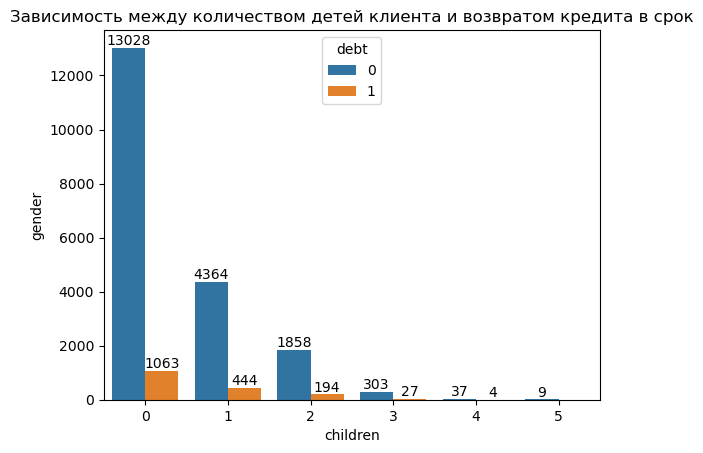

In [31]:
children_count = pd.pivot_table(data, index=['children', 'debt'], values=['gender'], aggfunc={'gender': len}, fill_value=0).reset_index()
a = seaborn.barplot(x=children_count['children'], y=children_count['gender'], hue=children_count['debt'])
a.set_title('Зависимость между количеством детей клиента и возвратом кредита в срок')

for i in a.containers:
    a.bar_label(i,)

**Посчитаем процент клиентов с долгами по каждому количеству детей.**

Процент клиентов без детей, имеющих задолженность

In [28]:
percent_without_children = children_count.loc[1,'gender']/children_count.loc[0,'gender']
print(f'{percent_without_children:.0%}') 

8%


Процент клиентов с 1 ребенком, имеющих задолженность

In [29]:
percent_with_one_child = children_count.loc[3,'gender']/children_count.loc[2,'gender']
print(f'{percent_with_one_child:.0%}') 

10%


Процент клиентов с 2 детьми, имеющих задолженность

In [30]:
percent_with_two_children = children_count.loc[5,'gender']/children_count.loc[4,'gender']
print(f'{percent_with_two_children:.0%}') 

10%


Считать процент должников с 3, 4 и 5 детьми нецелесообразно, так как общее количество таких клиентов крайне малО по сравнению с остальными.

**Вывод: Для того, чтобы окончательно подтвердить гипотезу, необходимы дополнительные данные. Количество многодетных клиентов очень малО, например, клиентов, имеющих 5 детей всего *9*. По данной диаграмме можно сделать следующие выводы:**
- чаще всего берут кредит клиенты без детей;
- 8% должников среди клиентов, не имеющих детей;
- 10% должников среди клиентов с 1 ребенком;
- 10% должников среди клиентов с 2 детьми.

## Есть ли зависимость между семейным положением и возвратом кредита в срок?

Для ответа на этот вопрос проверим следующую гипотезу:

***Семейное положение клиента влияет на возврат кредита в срок***

Если данная гипотеза подтвердится, то зависимость между семейным положением и возвратом кредита в срок есть, если не подтвердится, то нет.

**Создана сводная таблица `family_count`, в которой есть следующие столбцы: `family_status` - семейное положение и `debt`, где 0 означает, что долгов по кредиту нет и 1, если есть. Сама таблица заполнена количеством клиентов по каждому из столбцов.**

Построена диаграмма, где по вертикальной оси указано количество клиентов, по горизонтальной оси указано семейное положение и цветом различаются значения столбца debt, синий цвет - 0, если у клиента не было задолженностей по кредитам и оранжевый - 1, если были.

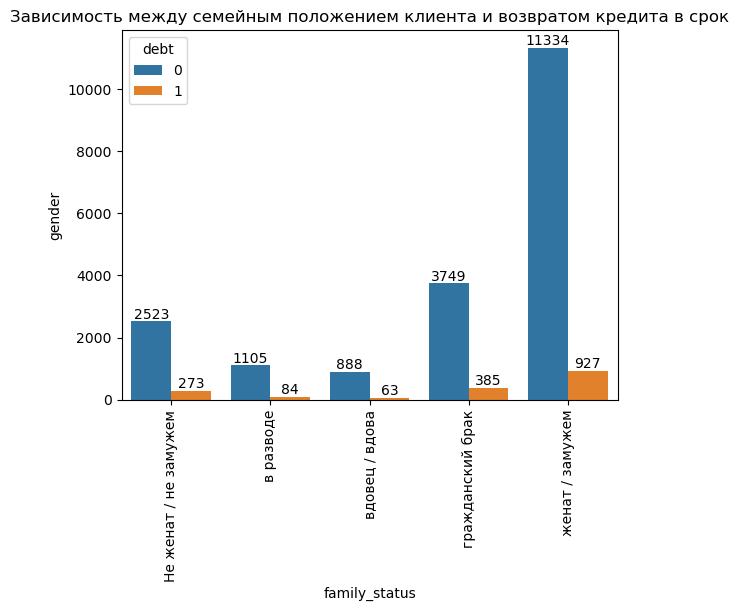

In [33]:
import matplotlib.pyplot as plt
family_count = pd.pivot_table(data, index=['family_status', 'debt'], values=['gender'], aggfunc={'gender': len}, fill_value=0).reset_index()
b = seaborn.barplot(x=family_count['family_status'], y=family_count['gender'], hue=family_count['debt'])
b.set_title('Зависимость между семейным положением клиента и возвратом кредита в срок')
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
for i in b.containers:
    b.bar_label(i,)

**Посчитаем процент клиентов с долгами по каждому семейному положению.**

In [34]:
percent_no_married = family_count.loc[1,'gender']/family_count.loc[0,'gender']
percent_divorce = family_count.loc[3,'gender']/family_count.loc[2,'gender']
percent_widow = family_count.loc[5,'gender']/family_count.loc[4,'gender']
percent_civil = family_count.loc[7,'gender']/family_count.loc[6,'gender']
percent_married = family_count.loc[9,'gender']/family_count.loc[8,'gender']
print('Процент должников со статусом не женат/не замужем: ', f'{percent_no_married:.0%}')
print('Процент должников со статусом в разводе: ', f'{percent_divorce:.0%}') 
print('Процент должников со статусом вдовец/вдова: ', f'{percent_widow:.0%}') 
print('Процент должников со статусом гражданский брак: ', f'{percent_civil:.0%}')
print('Процент должников со статусом женат/замужем: ', f'{percent_married:.0%}')

Процент должников со статусом не женат/не замужем:  11%
Процент должников со статусом в разводе:  8%
Процент должников со статусом вдовец/вдова:  7%
Процент должников со статусом гражданский брак:  10%
Процент должников со статусом женат/замужем:  8%


**Вывод: Зависимость между семейным положением и возвратом кредита есть. Чаще всего являются должниками клиенты со статусом: *не женат/не замужем* и *гражданский брак*. Реже всего имеют долги клиенты с семейным положением: *вдовец/вдова*.**

**Общая статистика:**
- Чаще всего кредит берут клиенты со статусом: женат/замужем; 
- 7% должников со статусом вдовец/вдова;
- 8% должников со статусом в разводе;
- 8% должников со статусом женат/замужем;
- 10% должников со статусом гражданский брак;
- 11% должников со статусом не женат/не замужем.

## Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Чтобы ответить на данный вопрос проверим следующую гипотезу:

***От уровня дохода зависит возврат кредита в срок***

Если данная гипотеза подтвердится, то зависимость между уровнем дохода и возвратом кредита в срок есть, если опровергнется, то нет.

**Ранее в проекте были созданы категории по уровню дохода клиентов, используем их сейчас.**

**Создана сводная таблица `income_count`, в которой есть следующие столбцы: `total_income_category` - категория дохода клиента и `debt`, где 0 означает, что долгов по кредиту нет и 1, если есть. Сама таблица заполнена количеством клиентов по каждому из столбцов.**

Построена диаграмма, где по вертикальной оси указано количество клиентов, по горизонтальной оси указано категория дохода и цветом различаются значения столбца debt, синий цвет - 0, если у клиента не было задолженностей по кредитам и оранжевый - 1, если были.

In [35]:
pd.pivot_table(data, index=['total_income_category', 'debt'], values=['gender'], aggfunc={'gender': len}, fill_value=0).reset_index()

,total_income_category,debt,gender
0,A,0,23
1,A,1,2
2,B,0,4660
3,B,1,354
4,C,0,14568
5,C,1,1353
6,D,0,328
7,D,1,21
8,E,0,20
9,E,1,2


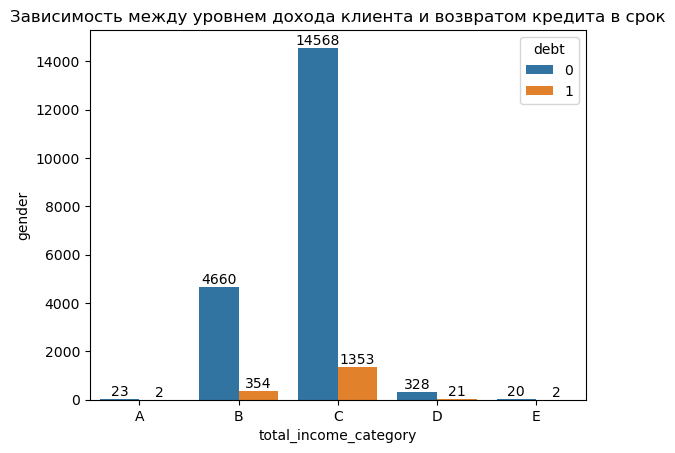

In [37]:
income_count = pd.pivot_table(data, index=['total_income_category', 'debt'], values=['gender'], aggfunc={'gender': len}, fill_value=0).reset_index()
income_count
c = seaborn.barplot(x=income_count['total_income_category'], y=income_count['gender'], hue=income_count['debt'])
c.set_title('Зависимость между уровнем дохода клиента и возвратом кредита в срок')
for i in c.containers:
    c.bar_label(i,)

**Посчитаем процент клиентов с долгами по каждой категории дохода.**

In [38]:
percent_B = income_count.loc[3,'gender']/income_count.loc[2,'gender']
percent_C = income_count.loc[5,'gender']/income_count.loc[4,'gender']
print('Процент должников с доходом от 200001 до 1000000: ', f'{percent_B:.0%}')
print('Процент должников с доходом от 50001 до 200000: ', f'{percent_C:.0%}')

Процент должников с доходом от 200001 до 1000000:  8%
Процент должников с доходом от 50001 до 200000:  9%


Считать процент должников с доходом категорий: А, D, E нецелесообразно, так как общее количество таких клиентов крайне малО по сравнению с остальными.


**Вывод: Для того, чтобы окончательно подтвердить гипотезу, необходимы дополнительные данные. Количество клиентов с доходом категорий: А, D, E очень малО, например, клиентов, имеющих доход от 0 до 30000 детей всего 12. По данной диаграмме можно сделать следующие выводы:**
- 8% должников с доходом от 200001 до 1000000
- 9% должников с доходом от 50001 до 200000

**От количества дохода зависит возврат кредита в срок, но для конечного подтверждения необходимы дополнительные данные**

## Как разные цели кредита влияют на его возврат в срок?

**Для того, чтобы ответить на этот вопрос, была создана сводная таблица `purpose_count`, в которой есть следующие столбцы: `pupose_category` - причина получения кредита и `debt`, где 0 означает, что долгов по кредиту нет и 1, если есть. Сама таблица заполнена количеством клиентов по каждому из столбцов.**

Построена диаграмма, где по вертикальной оси указано количество клиентов, по горизонтальной оси указана причина получения кредита и цветом различаются значения столбца debt, синий цвет - 0, если у клиента не было задолженностей по кредитам и оранжевый - 1, если были.**

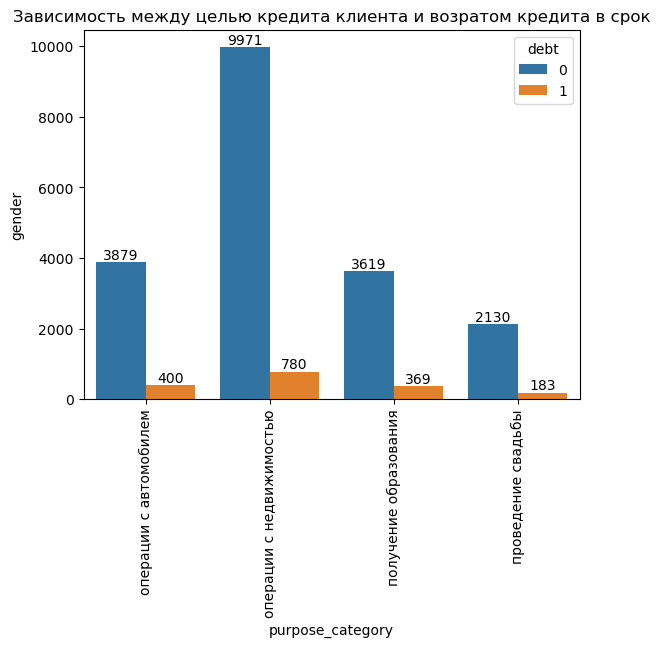

In [40]:
purpose_count = pd.pivot_table(data, index=['purpose_category', 'debt'], values=['gender'], aggfunc={'gender': len}, fill_value=0).reset_index()
purpose_count
d = seaborn.barplot(x=purpose_count['purpose_category'], y=purpose_count['gender'], hue=purpose_count['debt'])
d.set_title('Зависимость между целью кредита клиента и возратом кредита в срок')
d.set_xticklabels(d.get_xticklabels(),rotation = 90)
for i in d.containers:
    d.bar_label(i,)
    

**Посчитаем процент клиентов с долгами по каждой причине получения кредита.**

In [41]:
percent_auto = purpose_count.loc[1,'gender']/purpose_count.loc[0,'gender']
percent_house = purpose_count.loc[3,'gender']/purpose_count.loc[2,'gender']
percent_educ = purpose_count.loc[5,'gender']/purpose_count.loc[4,'gender']
percent_marri = purpose_count.loc[7,'gender']/purpose_count.loc[6,'gender']
print('Процент должников, которые приобрели кредит для операций с автомобилем: ', f'{percent_auto:.0%}')
print('Процент должников, которые приобрели кредит для операций с недвижимостью: ', f'{percent_house:.0%}') 
print('Процент должников, которые приобрели кредит для получения образования: ', f'{percent_educ:.0%}') 
print('Процент должников, которые приобрели кредит для проведения свадьбы: ', f'{percent_marri:.0%}')

Процент должников, которые приобрели кредит для операций с автомобилем:  10%
Процент должников, которые приобрели кредит для операций с недвижимостью:  8%
Процент должников, которые приобрели кредит для получения образования:  10%
Процент должников, которые приобрели кредит для проведения свадьбы:  9%


**Вывод: Меньше всего долгов имеют клиенты, берущие кредит для операций с недвижимостью. Меньше стоит доверять клиентам, берущим кредит на получение образования и для операций с автомобилем**
- Чаще всего берут кредит для операций с недвижимостью, они же реже остальных имеют долги;
- 8% должников, которые приобрели кредит для операций с недвижимостью;
- 9% должников, которые приобрели кредит для проведения свадьбы;
- 10% должников, которые приобрели кредит для операций с автомобилем;
- 10% должников, которые приобрели кредит для получения образования.

## Приведите возможные причины появления пропусков в исходных данных.

**Существуют две глобальные причины:**
- человеческий фактор
- технический сбой

**В переданных нам данных мы нашли пропуски в стобцах `days_employed` - колчество отработанных дней и`total_income` - заработок.**

Откроем исходную таблицу и посмотрим на строки с пропусками

In [42]:
data1 = pd.read_csv('C:/Users/klimatutti/Downloads/data.csv')
data1.loc[data1['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


**Оказалось, что если в столбце `days_employed` есть пропуски, то и в `total_income` они тоже есть. Больше ничего общего между этими клиентами нет.**

**Можно сделать предположение о том, что это технический сбой.**


## Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

**Рассчитать медиану - лучшее решение для данных, в которых есть аномальные значения. В таких данный медианное значение даст более реалистичную оценку центрального значения.**

Например, есть список данных `[1,2,100,3,-39]`. Нужно найти среднее значение. Найдем его с помощью метода `mean()`

In [43]:
import statistics as st
st.mean([1,2,100,3,-39])

13.4

Но! В данных есть аномальные значения: *100* и *-39*. Попробуем применить найти медианное значение с помощью метода `median()`

In [44]:
st.median([1,2,100,3,-39])

2

Значения значительно отличаются и второй вариант больше похож на правду.

## Вывод


### От количества детей зависит возврат кредита в срок

  **Для того, чтобы окончательно подтвердить гипотезу, необходимы дополнительные данные. Количество многодетных клиентов очень малО, например, клиентов, имеющих 5 детей всего *9*.**

  - 8% должников среди клиентов, не имеющих детей;
  - 10% должников среди клиентов с 1 ребенком;
  - 10% должников среди клиентов с 2 детьми.

 **Из-за недостаточного количества данных гипотезу советуется считать ненадёжной**



### Семейное положение клиента влияет на погашение кредита в срок

  **Зависимость между семейным положением и возвратом кредита есть. Чаще всего являются должниками клиенты со статусом: *не женат/не замужем* и *гражданский брак*. Реже всего имеют долги клиенты с семейным положением: *вдовец/вдова*.**

   - 7% должников со статусом вдовец/вдова;
   - 8% должников со статусом в разводе;
   - 8% должников со статусом женат/замужем;
   - 10% должников со статусом гражданский брак;
   - 11% должников со статусом не женат/не замужем.
  
  **Можно положиться на клиентов со статусом *вдовец/вдова*, с осторожностью доверять клиентам со статусом *не женат/не замужем***
  
  
### Доход клиента влияет на погашение кредита в срок  

**Для того, чтобы окончательно подтвердить гипотезу, необходимы дополнительные данные. Количество клиентов с доходом категорий: А, D, E очень малО, например, клиентов, имеющих доход от 0 до 30000 детей всего 12.**

  - 8% должников с доходом от 200001 до 1000000
  - 9% должников с доходом от 50001 до 200000

 **От количества дохода зависит возврат кредита в срок, но для конечного подтверждения необходимы дополнительные данные. Гипотезу советуется считать ненадёжной.**


### Цели кредита влияют на погашение кредита в срок

  **Меньше всего долгов имеют клиенты, берущие кредит для операций с недвижимостью. Меньше стоит доверять клиентам, берущим кредит на получение образования и для операций с автомобилем.**

   - 8% должников, которые приобрели кредит для операций с недвижимостью;
   - 9% должников, которые приобрели кредит для проведения свадьбы;
   - 10% должников, которые приобрели кредит для операций с автомобилем;
   - 10% должников, которые приобрели кредит для получения образования.
  
  **Можно положиться на клиентов, которые приобрели кредит для операций с недвижимостью, с осторожностью доверять клиентам, которые приобрели кредит для операций с автомобилем и для получения образования.**

**Для того, чтобы полагаться на неподтвержденные гипотезы необходимы дополнительные данные.**